In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
credits = pd.read_csv('/content/drive/MyDrive/EPOCH/data/Copy of credits.csv')
key = pd.read_csv('/content/drive/MyDrive/EPOCH/data/Copy of keywords.csv')
links = pd.read_csv('/content/drive/MyDrive/EPOCH/data/Copy of links.csv')
movies = pd.read_csv('/content/drive/MyDrive/EPOCH/data/Copy of movies_metadata.csv')
ratings = pd.read_csv('/content/drive/MyDrive/EPOCH/data/Copy of ratings.csv')
movie_remove = pd.read_csv('/content/drive/MyDrive/EPOCH/data/movies_metadata_removed.csv')
movie_release = pd.read_csv('/content/drive/MyDrive/EPOCH/data/movies_metadata_released_order.csv')

<ipython-input-4-8104f88fab2b>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/content/drive/MyDrive/EPOCH/data/Copy of movies_metadata.csv')


In [ ]:
credits = pd.DataFrame(credits)
key = pd.DataFrame(key)
links = pd.DataFrame(links)
movies = pd.DataFrame(movies)
ratings = pd.DataFrame(ratings)
movie_remove = pd.DataFrame(movie_remove)
movie_release = pd.DataFrame(movie_release)

### 결측치 확인


In [ ]:
movie_release.shape
movie_remove.shape

movie_release[movie_release['budget'] == '0'].shape # 예산이 0인 행이 2906개나 되는데?
movie_release[movie_release['revenue'] == 0] # 수익이 0인 행이 3007개나 되는데?

movie_release.isnull().sum()
movie_release[movie_release['revenue'] == 0]
movie_release.dtypes

,0
belongs_to_collection,object
budget,object
genres,object
id,object
original_language,object
original_title,object
overview,object
popularity,object
production_companies,object
production_countries,object


### 이상치 데이터 1행 하나 더 삭제

In [ ]:
# 'budget' 열에서 숫자가 아닌 값들을 NaN으로 변환
non_numeric_budget = pd.to_numeric(movie_release['budget'], errors='coerce')

# 원래 값 중에서 NaN으로 변환된 값들만 추출
non_numeric_values = movie_release['budget'][non_numeric_budget.isna()]

# 숫자가 아닌 값 출력
print(non_numeric_values)
print(movie_release[movie_release['budget'] == '/zaSf5OG7V8X8gqFvly88zDdRm46.jpg']) # 삭제한 행

movie_release2 = movie_release.drop(index = 4488)
movie_release2

4488    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
Name: budget, dtype: object
     belongs_to_collection                            budget  \
4488              2.185485  /zaSf5OG7V8X8gqFvly88zDdRm46.jpg   

                                                 genres          id  \
4488  [{'name': 'Odyssey Media', 'id': 17161}, {'nam...  2014-01-01   

     original_language                            original_title  overview  \
4488              82.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                 popularity production_companies production_countries  \
4488  Beware Of Frost Bites                False                  4.3   

     release_date  revenue  runtime spoken_languages status tagline title  \
4488           22      NaN      NaN              NaN    NaN     NaN   NaN   

      vote_average  vote_count  
4488           NaN         NaN  


,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,"{'id': 188534, 'name': 'Fantômas Serial'}",0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",56508,fr,Fantômas: À l'ombre de la guillotine,"For the arch-criminal Fantômas, no crime is to...",0.791727,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",1913-05-09,0.0,54.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Fantômas: In the Shadow of the Guillotine,6.7,13.0
1,"{'id': 188534, 'name': 'Fantômas Serial'}",0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",56511,fr,Fantômas: Juve contre Fantômas,When a disfigured body of a woman is found in ...,0.787866,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",1913-09-12,0.0,59.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Fantômas: Juve Against Fantômas,6.4,11.0
2,"{'id': 188534, 'name': 'Fantômas Serial'}",0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",56516,fr,Fantômas: Le mort qui tue,"Fantômas murders a baroness, cleverly framing ...",0.414734,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",1913-11-28,0.0,90.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Fantômas: The Dead Man Who Killed,6.4,8.0
3,"{'id': 188534, 'name': 'Fantômas Serial'}",0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",56512,fr,Fantômas: Fantômas contre Fantômas,After his failed attempts to capture the ruthl...,0.322249,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",1914-03-13,0.0,59.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Fantômas: Fantômas Against Fantômas,6.2,8.0
4,"{'id': 188534, 'name': 'Fantômas Serial'}",0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",56515,fr,Fantômas: Le faux magistrat,Inspector Juve finds out that Fantômas is serv...,0.237483,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",1914-05-08,0.0,70.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Fantômas: The False Magistrate,5.4,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4486,"{'id': 14890, 'name': 'Bad Boys Collection'}",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",38700,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,2.178546,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-11-07,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,Bad Boys for Life,0.0,12.0
4487,"{'id': 87096, 'name': 'Avatar Collection'}",0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",76600,en,Avatar 2,A sequel to Avatar (2009).,6.020055,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,Avatar 2,0.0,58.0
4489,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",122662,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4490,"{'id': 283579, 'name': 'Divergent Collection'}",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",283489,en,Ascendant,Beatrice Prior and Tobias Eaton fight to end t...,8.518516,"[{'name': 'Summit Entertainment', 'id': 491}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,Ascendant,5.7,3.0


### `budget`, `id`, `popularity` 데이터 타입 변경

In [ ]:
movie_release2 = movie_release2.astype({'budget': 'float', 'id': 'int', 'popularity': 'float'})
movie_release2['budget']

movie_release2.dtypes

movie_release2.to_csv('movies_metadata_released_order2.csv', index=False)
# from google.colab import files
# files.download('movies_metadata_released_order2.csv')

In [ ]:
movie_revenue0 = movie_release[movie_release['revenue'] == 0]
movie_revenue0.to_csv('movie_revenue0.csv', index=False)
# from google.colab import files
# files.download('movie_revenue0.csv')

movie_revenue0_title = movie_release[movie_release['revenue'] == 0]['title']
movie_revenue0_title.to_csv('movie_revenue0_title.csv', index=False)
# from google.colab import files
# files.download('movie_revenue0_title.csv')

평점이 0인게 56개

In [ ]:
movie_cleaned = pd.read_csv('/content/drive/MyDrive/EPOCH/data/movies_cleaned.csv')
movie_cleaned = pd.DataFrame(movie_cleaned)

movie_cleaned[movie_cleaned['vote_average']==0].shape

(56, 15)

In [ ]:
movie_cleaned[movie_cleaned['revenue']==0].shape # 2987
movie_cleaned[movie_cleaned['budget']==0].shape # 2886
movie_cleaned.shape

2987+2886-2627

movie_cleaned[movie_cleaned['revenue']==0][movie_cleaned['budget']==0].shape #2627


4470-3246

<ipython-input-11-612af984e3b9>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movie_cleaned[movie_cleaned['revenue']==0][movie_cleaned['budget']==0].shape #2627


1224

리뷰 데이터셋 활용해보기

In [ ]:
review = pd.read_csv('/content/drive/MyDrive/EPOCH/data/IMDB_dataset_320.000_reviews.csv')
movie_cleaned_removed = pd.read_csv('/content/drive/MyDrive/EPOCH/data/movies_cleaned_removed.csv')

review = pd.DataFrame(review)
movie_cleaned_removed = pd.DataFrame(movie_cleaned_removed)

In [ ]:
review_merge = pd.merge(review, movie_cleaned_removed, left_on='original title', right_on='title', how='inner')
review_merge.shape

(32310, 31)

영화가 200여개밖에 없다
-> 탈락

In [ ]:
review_merge_unique = review_merge.drop_duplicates(subset='title')
review_merge_unique.shape

(228, 31)

새로운 데이터로 revenue 결측치를 채울 수 있나 확인

In [ ]:
# tmd/b = pd.read_csv('/content/drive/MyDrive/EPOCH/data/TMDB_movie_dataset_v11.csv')

# tmdb = pd.DataFrame(tmdb)

# tmdb_merge = pd.merge(tmdb, movie_cleaned_removed, on='title', how='inner')
# tmdb_merge.shape
# tmdb_merge[tmdb_merge['revenue_x']==0].shape
# 안된다. 똑같다.

revenue 컬럼과 상관관계 분석


In [ ]:
movie_onehot = pd.read_csv('/content/drive/MyDrive/EPOCH/data/movies_cleaned_removed_onehot.csv')
movie_onehot = pd.DataFrame(movie_onehot)

,budget,id,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,...,Family,Mystery,Romance,Animation,Drama,Comedy,Foreign,Adventure,Science Fiction,Horror
0,291000,3035,8.091603,12000000,71.0,Frankenstein,7.3,295.0,1931,11,...,0,0,0,0,1,0,0,0,1,1
1,672000,244,8.732740,10000000,100.0,King Kong,7.7,346.0,1933,4,...,0,0,0,0,1,0,0,1,0,1
2,250000,43149,1.771424,616000,70.0,The Son of Kong,5.2,31.0,1933,12,...,0,0,0,0,0,0,0,1,1,1
3,226408,3529,10.573867,1423000,93.0,The Thin Man,7.4,97.0,1934,5,...,0,1,0,0,0,1,0,0,0,0
4,393750,229,7.000417,2000000,75.0,Bride of Frankenstein,7.4,208.0,1935,4,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,80000000,324852,36.631519,1034800131,96.0,Despicable Me 3,6.2,2002.0,2017,6,...,1,0,0,1,0,1,0,1,0,0
1209,175000000,260514,19.148182,383925276,109.0,Cars 3,6.6,718.0,2017,6,...,1,0,0,1,0,1,0,1,0,0
1210,217000000,335988,39.186819,605425157,149.0,Transformers: The Last Knight,6.2,1440.0,2017,6,...,0,0,0,0,0,0,0,1,1,0
1211,12000000,203835,20.712818,8481997,85.0,Amityville: The Awakening,5.8,98.0,2017,6,...,0,0,0,0,0,0,0,0,0,1


장르 제외 컬럼들 간의 상관관계 분석

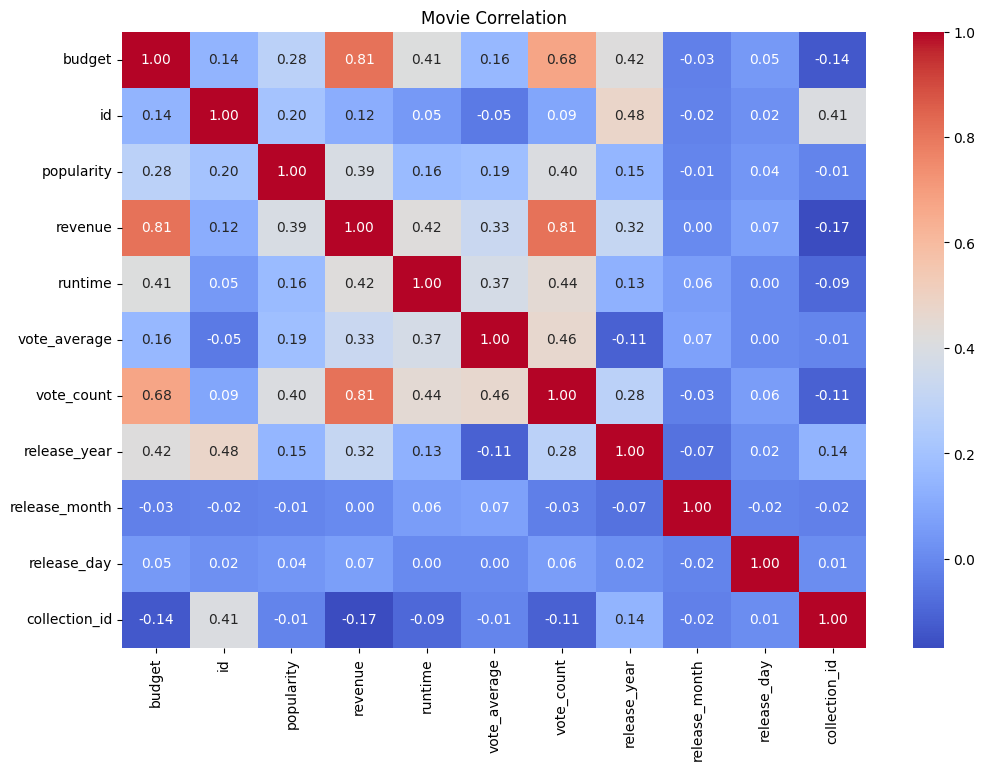

In [ ]:
# 수치형 변수만을 선택
movie_numeric_data = movie_onehot.select_dtypes(include=['float64', 'int64'])
# 장르 컬럼 20개 제외
movie_numeric_genrex = movie_numeric_data.iloc[:,:-20]

# 상관계수 계산
correlation_movie = movie_numeric_genrex.corr()

# 상관계수 행렬 출력
# print(correlation_matrix)

# 시각화 (선택 사항)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_movie, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Movie Correlation')
plt.show()

장르 컬럼 넣어서 상관관계 분석

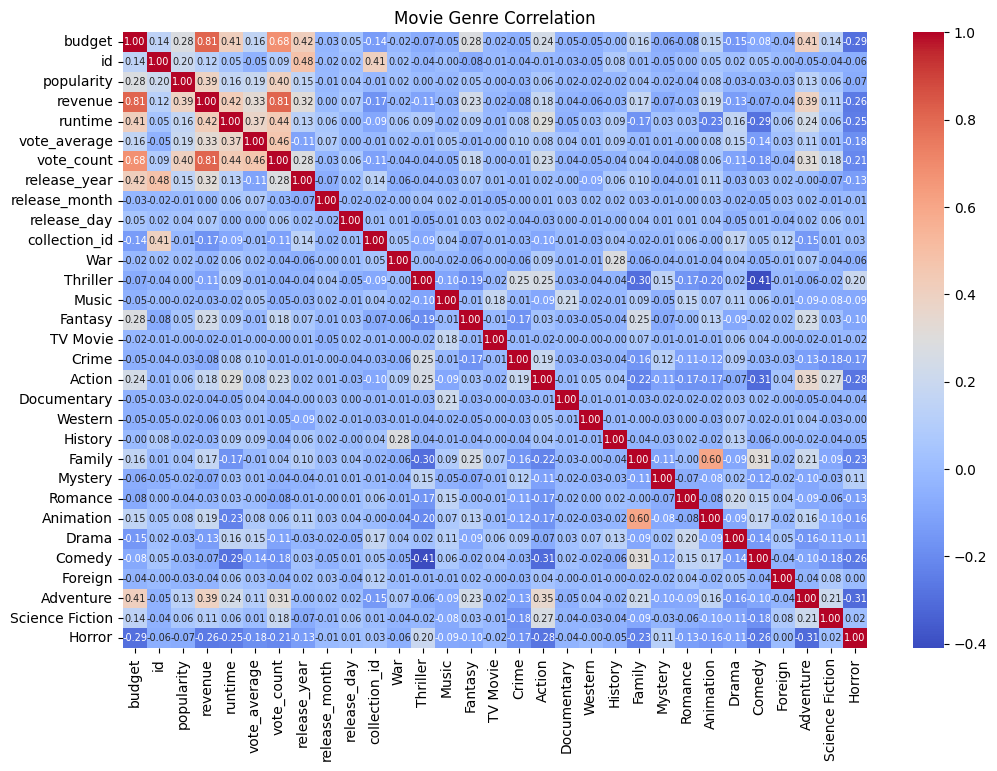

In [ ]:
# 수치형 변수만을 선택
movie_genre = movie_onehot.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
correlation_movie_genre = movie_genre.corr()

# 상관계수 행렬 출력
# print(correlation_movie_genre)

# 시각화 (선택 사항)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_movie_genre, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7})
plt.title('Movie Genre Correlation')
plt.show()

GPT가 만들어준 train_set을 확인해보쟈

In [ ]:
test_set = pd.read_csv('/content/drive/MyDrive/EPOCH/data/test_set.csv')
train_set = pd.read_csv('/content/drive/MyDrive/EPOCH/data/train_set.csv')

test_set = pd.DataFrame(test_set)
train_set = pd.DataFrame(train_set)

,budget,id,popularity,revenue,runtime,title,vote_average,vote_count,release_year,release_month,...,Mystery,Romance,Animation,Drama,Comedy,Foreign,Adventure,Science Fiction,Horror,release_date
0,200000000,330459,36.567575,1056057273,133.0,Rogue One: A Star Wars Story,7.4,5111.0,2016,12,...,0,0,0,0,0,0,1,1,0,2016-12-14
1,185000000,217,12.577266,786636033,122.0,Indiana Jones and the Kingdom of the Crystal S...,5.7,2558.0,2008,5,...,0,0,0,0,0,0,1,0,0,2008-05-21
2,94000000,122,29.324358,1118888979,201.0,The Lord of the Rings: The Return of the King,8.1,8226.0,2003,12,...,0,0,0,0,0,0,1,0,0,2003-12-01
3,27000000,174,5.900570,96888996,113.0,Star Trek VI: The Undiscovered Country,6.7,421.0,1991,12,...,0,0,0,0,0,0,1,1,0,1991-12-05
4,54000000,242,17.185349,136766062,162.0,The Godfather: Part III,7.1,1589.0,1990,12,...,0,0,0,1,0,0,0,0,0,1990-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2700000,32620,3.027586,2600000,108.0,The Drowning Pool,6.5,21.0,1975,7,...,1,0,0,1,0,0,0,0,0,1975-07-01
427,2000000,5894,11.528147,1300000,83.0,Blue in the Face,6.8,28.0,1995,9,...,0,0,0,0,1,0,0,0,0,1995-09-15
428,97000000,263115,54.581997,619021436,137.0,Logan,7.6,6310.0,2017,2,...,0,0,0,1,0,0,0,1,0,2017-02-28
429,2000000,227932,4.117801,39195565,96.0,My Mom Is a Character 2,7.8,100.0,2016,12,...,0,0,0,0,1,0,0,0,0,2016-12-22


In [ ]:
movie_testset = movie_onehot.loc[movie_onehot.groupby('collection_id')['release_year'].idxmax(), ['collection_id', 'release_year', 'title']]
testset_check = test_set[~test_set['title'].isin(movie_testset['title'])]

testset_check
movie_testset[movie_testset['collection_id']==439053]

test_set[test_set['collection_id']==439053]


# 지피티의 test set이 맞다 !!

# test_set = test_set.drop(columns=['release_date'])
# train_set = train_set.drop(columns=['release_date'])

test_set.shape # (431, 33)
train_set.shape # (782, 33)
movie_onehot.shape # (1213, 33)

# test set, train_set 저장

test_set.to_csv('test_set.csv', index=False)
train_set.to_csv('train_set.csv', index=False)

# from google.colab import files
# files.download('train_set.csv')
# files.download('test_set.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>